# Project Luther
# Predicting Project's Pledged Amount om kickstarter.com

# Part 1. Web-scraping Initiate selenium

### Initiate selenium

In [101]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

import os
chromedriver = "/Applications/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver

In [102]:
driver = webdriver.Chrome(chromedriver)

### Collect all categories links from the main page
#### Because of XML component and dynamic links rendering, scraping was not straightforward

In [3]:
#Kickstarter's entrance page
driver.get('https://www.kickstarter.com/discover?ref=nav')
categories = driver.find_elements_by_class_name('category-container')

category_links = []
for category_link in categories:
#Each item in the list is a tuple of the category's name and its link.
    category_links.append((str(category_link.find_element_by_class_name('f3').text),
    category_link.find_element_by_class_name('bg-white').get_attribute('href')))

In [426]:
category_links #15 categories total

[('Art',
  'https://www.kickstarter.com/discover/categories/art?ref=discover_index'),
 ('Comics',
  'https://www.kickstarter.com/discover/categories/comics?ref=discover_index'),
 ('Crafts',
  'https://www.kickstarter.com/discover/categories/crafts?ref=discover_index'),
 ('Dance',
  'https://www.kickstarter.com/discover/categories/dance?ref=discover_index'),
 ('Design',
  'https://www.kickstarter.com/discover/categories/design?ref=discover_index'),
 ('Fashion',
  'https://www.kickstarter.com/discover/categories/fashion?ref=discover_index'),
 ('Film & Video',
  'https://www.kickstarter.com/discover/categories/film%20&%20video?ref=discover_index'),
 ('Food',
  'https://www.kickstarter.com/discover/categories/food?ref=discover_index'),
 ('Games',
  'https://www.kickstarter.com/discover/categories/games?ref=discover_index'),
 ('Journalism',
  'https://www.kickstarter.com/discover/categories/journalism?ref=discover_index'),
 ('Music',
  'https://www.kickstarter.com/discover/categories/music?

### Collect project links for each individual category
### To get to that level of the web-site, need to click through 3 links

In [75]:
projects = []
for category in category_links:

    # 'sentence-open' link is analogous to clicking on "Refine search" on the page
    driver.get(category[1])
    driver.find_element_by_class_name('sentence-open').click()
    time.sleep(2)
    # 'category_filter' get to the page with all category links
    driver.find_element_by_id('category_filter').click()
    time.sleep(2)

    # Why 27 if the number of categories is 15? Because category ids are in arbitrary order, not 
    # sequential, and  of arbitrary magnitue, with min=1 and max=26 
    for i in range(27):
            try:
                driver.find_element_by_id('category_'+str(i)).click()
                
            except:
                pass
        
    # Only 20 projects are loaded on the 1st page; need to "Load more" and scroll to keep
    # loading  -  also need to manually activate the window to let it go beyond 2 pages
    time.sleep(2)
    driver.find_element_by_class_name('load_more').click()
    driver.execute_script("window.scrollTo(0,2500)")
    time.sleep(2)
    driver.execute_script("window.scrollTo(0,5000)")
    time.sleep(12)
    driver.execute_script("window.scrollTo(0,0)")
    time.sleep(2)

    # Scrape project links; since it takes long time, dont go over 300 projects per category
    counter = 0
    for project_link in driver.find_elements_by_class_name('project-title'):
        counter += 1
        projects.append(project_link.find_element_by_tag_name('a').get_attribute('href'))
        if counter > 300:
            break

In [76]:
len(projects)

3169

### Scrape project level web pages. 

In [93]:
import time 
from datetime import datetime
from collections import OrderedDict
import re

scraped_data = []
now = datetime.now()
counter = 1


for project in projects:
    time.sleep(2)
    print(str(counter)+': '+project+'\nStatus: Started.')  ##for tracking
    project_dict = OrderedDict()
    project_dict['Category'] = category[0]
    driver.get(project)
    project_dict['Link'] = project
  
    try:
        project_dict['Stats'] = driver.find_elements_by_class_name('NS_campaigns__stats')[0].text
    except:
        pass
    try:
        project_dict['Badges'] = driver.find_elements_by_class_name('NS_projects__badges')[0].text
    except:
        pass  

    print('Status: Done.')
    counter+=1
    scraped_data.append(project_dict)

1: https://www.kickstarter.com/projects/1494661930/tropics-a-celebration-of-our-neighborhood?ref=category
Status: Started.
Status: Done.
2: https://www.kickstarter.com/projects/1511810469/say-something-bunny?ref=category
Status: Started.
Status: Done.
3: https://www.kickstarter.com/projects/artspacesydney/52-artists-52-actions?ref=category
Status: Started.
Status: Done.
4: https://www.kickstarter.com/projects/899731242/the-jim-henson-exhibition-at-museum-of-the-moving?ref=category
Status: Started.
Status: Done.
5: https://www.kickstarter.com/projects/182319160/tear-down-this-wall?ref=category
Status: Started.
Status: Done.
6: https://www.kickstarter.com/projects/1590217907/the-black-prism-oracle?ref=category
Status: Started.
Status: Done.
7: https://www.kickstarter.com/projects/dsap/support-daily-serving-and-art-practical?ref=category
Status: Started.
Status: Done.
8: https://www.kickstarter.com/projects/louderthanwordsart/women-on-the-move-prevent-domestic-violence-and-se?ref=category

WebDriverException: Message: unknown error: session deleted because of page crash
from tab crashed
  (Session info: chrome=58.0.3029.81)
  (Driver info: chromedriver=2.29.461585 (0be2cd95f834e9ee7c46bcc7cf405b483f5ae83b),platform=Mac OS X 10.12.4 x86_64)


In [95]:
# Save scraped data (a list of dictionaries) as a dataframe
import pandas as pd
df = pd.DataFrame(scraped_data)

In [97]:
# Save that as a pickle file
import pickle

with open('kickstarter_data_p1.pkl', 'wb') as picklefile:
    pickle.dump(df, picklefile)

## Scraping crashed at link #1766, so had to resubmit it from project #1766

In [103]:
import time 
from datetime import datetime
from collections import OrderedDict
import re

scraped_data = []
now = datetime.now()
counter = 1

projects2 = projects[1766:]

for project in projects2:
    time.sleep(2)
    print(str(counter)+': '+project+'\nStatus: Started.')
    project_dict = OrderedDict()
    project_dict['Category'] = category[0]
    driver.get(project)
    project_dict['Link'] = project
  
    try:
        project_dict['Stats'] = driver.find_elements_by_class_name('NS_campaigns__stats')[0].text
    except:
        pass
    try:
        project_dict['Badges'] = driver.find_elements_by_class_name('NS_projects__badges')[0].text
    except:
        pass  

    print('Status: Done.')
    counter+=1
    scraped_data.append(project_dict)

1: https://www.kickstarter.com/projects/401208565/restaurant-charlotte?ref=category
Status: Started.
Status: Done.
2: https://www.kickstarter.com/projects/400333426/2-paws-up-dogtreats-by-madison?ref=category
Status: Started.
Status: Done.
3: https://www.kickstarter.com/projects/2068972887/maryanns-restaurant?ref=category
Status: Started.
Status: Done.
4: https://www.kickstarter.com/projects/51932867/cafeteria-cuax-and-sun?ref=category
Status: Started.
Status: Done.
5: https://www.kickstarter.com/projects/183377674/sweet-heat-gourmet-hot-sauce-company?ref=category
Status: Started.
Status: Done.
6: https://www.kickstarter.com/projects/2112462571/farm-in-a-jar?ref=category
Status: Started.
Status: Done.
7: https://www.kickstarter.com/projects/341187281/saai-chai-fine-teas?ref=category
Status: Started.
Status: Done.
8: https://www.kickstarter.com/projects/1334570379/organic-olive-oil-from-calabria-italy-magna-graeci?ref=category
Status: Started.
Status: Done.
9: https://www.kickstarter.co

In [105]:
len(scraped_data)

1403

In [106]:
#Save second file as a dataframe
import pandas as pd
df2 = pd.DataFrame(scraped_data)

In [107]:
df2

,Category,Link,Stats,Badges
0,Theater,https://www.kickstarter.com/projects/401208565...,"$0.00\npledged of $75,078 goal\n0\nbackers\n22...","Restaurants\nBarcelona, Spain"
1,Theater,https://www.kickstarter.com/projects/400333426...,$51.00\npledged of $185 goal\n4\nbackers\n5\nd...,"Farmer's Markets\nEastern Passage, Canada"
2,Theater,https://www.kickstarter.com/projects/206897288...,"$0.00\npledged of $120,000 goal\n0\nbackers\n9...","Restaurants\nFort Lauderdale, FL"
3,Theater,https://www.kickstarter.com/projects/51932867/...,"$0.00\npledged of $1,860 goal\n0\nbackers\n31\...","Food\nMexico City, Mexico"
4,Theater,https://www.kickstarter.com/projects/183377674...,"$2,745\npledged of $2,500 goal\n50\nbackers\n1...","Food\nState College, PA"
5,Theater,https://www.kickstarter.com/projects/211246257...,$427\npledged of $500 goal\n15\nbackers\n33\nd...,"Food\nBaltimore, MD"
6,Theater,https://www.kickstarter.com/projects/341187281...,"$75.00\npledged of $60,000 goal\n2\nbackers\n2...","Drinks\nSouth Jordan, UT"
7,Theater,https://www.kickstarter.com/projects/133457037...,"$702\npledged of $10,725 goal\n3\nbackers\n13\...","Farms\nBadolato, Italy"
8,Theater,https://www.kickstarter.com/projects/192825240...,$133\npledged of $100 goal\n8\nbackers\n3\nday...,"Cookbooks\nPullman, WA"
9,Theater,https://www.kickstarter.com/projects/117852895...,"$0.00\npledged of $55,000 goal\n0\nbackers\n45...","Food Trucks\nIndianapolis, IN"


In [108]:
import pickle

with open('kickstarter_data_p2.pkl', 'wb') as picklefile:
    pickle.dump(df2, picklefile)

## Found a way to pull Launched date; also grabbed "Hero Funding" string just in case
### The scraping crashed twice, so I re-submitted it twice; hence multiple versions of projects and scraped data

In [155]:
import time 
from datetime import datetime
from collections import OrderedDict
import re

#scraped_data2 = []
#scraped_data3 = []
#scraped_data4 = []
#counter = 1

#projects2 = projects[:1000]
#projects3 = projects[1425:2000]
projects4 = projects[3008:]

for project in projects4:
    time.sleep(2)
    print(str(counter)+': '+project+'\nStatus: Started.')
    project_dict4 = OrderedDict()
    project_dict4['Category'] = category[0]
    driver.get(project)
    project_dict4['Link'] = project
    
    try:
        project_dict4['All'] = str(driver.find_element_by_class_name('NS_projects__hero_funding').text).split("\n")
    except:
        pass
    
    # To get to Launched date, one needs to click on "Updates" link on project page. 
    driver.find_element_by_css_selector("a[href*='updates']").click()
    time.sleep(2)
    
    try:
        project_dict4['Launched'] = str(driver.find_element_by_class_name('timeline__divider_content').text).split("\n")[0]
    except:
        pass
   

    print('Status: Done.')
    counter+=1
    scraped_data4.append(project_dict4)

1009: https://www.kickstarter.com/projects/1795298963/co-habitat-co-working-space?ref=category
Status: Started.
Status: Done.
1010: https://www.kickstarter.com/projects/1041150684/voetbaldatingnl-datingsite-voor-voetbalfans?ref=category
Status: Started.
Status: Done.
1011: https://www.kickstarter.com/projects/1077092786/dsp-crowds-raspberry-pi-to-de0-nano-connector?ref=category
Status: Started.
Status: Done.
1012: https://www.kickstarter.com/projects/weunity/weunity-the-free-community-organizing-mobile-app?ref=category
Status: Started.
Status: Done.
1013: https://www.kickstarter.com/projects/366852318/ecoweather?ref=category
Status: Started.
Status: Done.
1014: https://www.kickstarter.com/projects/917345245/the-gyroscope-web-startup?ref=category
Status: Started.
Status: Done.
1015: https://www.kickstarter.com/projects/1172862500/holocard-send-a-hologram-personalised-holograms-fo?ref=category
Status: Started.
Status: Done.
1016: https://www.kickstarter.com/projects/646871519/nuff-boards

In [162]:
len(scraped_data2)

1000

In [161]:
len(scraped_data3)

1000

In [160]:
len(scraped_data4)

1169

In [163]:
## Putting the three lists together

sd2 = pd.DataFrame(scraped_data2)
sd3 = pd.DataFrame(scraped_data3)
sd4 = pd.DataFrame(scraped_data4)

frames=[sd2, sd3, sd4]

df_all = pd.concat(frames)

In [174]:
df_all.shape

(3169, 4)

In [166]:
driver.close() ## scraping no more!

In [167]:
# Re-load first two pickles

import pickle
df_prev1 = pickle.load(open('kickstarter_data_p1.pkl', 'rb'))
df_prev2 = pickle.load(open('kickstarter_data_p2.pkl', 'rb'))

In [169]:
# Put the two together
frames2=[df_prev1, df_prev2]
df_prev = pd.concat(frames2)

In [232]:
#Append Launched date
df_model_raw = pd.merge(df_prev,df_all[['Link','Launched']],on='Link', how='inner')

In [233]:
df_model_raw.shape

(3168, 5)

In [235]:
df_model_raw.info() #all objects --> need recoding

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3167
Data columns (total 5 columns):
Category    3168 non-null object
Link        3168 non-null object
Stats       3165 non-null object
Badges      3165 non-null object
Launched    3158 non-null object
dtypes: object(5)
memory usage: 148.5+ KB


### Step 2: Data Parsing/Cleaning/Recoding

In [236]:
df_model_raw['Stats2'] = df_model_raw['Stats'].str.split("\n")

In [237]:
df_model_raw['Pledged'] = df_model_raw['Stats2'].str[0]

In [238]:
df_model_raw['Goal'] = df_model_raw['Stats2'].str[1]

In [239]:
df_model_raw['Backers'] = df_model_raw['Stats2'].str[2]

In [240]:
df_model_raw['Days_Left'] = df_model_raw['Stats2'].str[4]

In [241]:
df_model_raw['Badges2'] = df_model_raw['Badges'].str.split("\n")

In [242]:
df_model_raw['Location'] = df_model_raw['Badges2'].str[-1]

In [243]:
df_model_raw['Badge'] = df_model_raw['Badges2'].str[0]

In [ ]:
# x = 'pledged of $19,250 goal'
# re.findall('\$[0-9,]+',x)

df_model_raw['Goal2'] = df_model_raw['Goal'].str.split()
df_model_raw['Goal3'] = df_model_raw['Goal2'].str[2]

In [252]:
df_model_clean_ = df_model_raw.drop(['Stats','Badges','Stats2','Goal','Badges2','Goal2'], axis=1)

In [254]:
# End date wasn't readily available while Days Left were. So knowing when the data was pulled, 
# I can calculate End Date
df_model_clean_['Pull_Date']= pd.to_datetime('23APR17:00:00:00', format='%d%b%y:%H:%M:%S') 

In [256]:
df_model_clean_['country_'] = df_model_clean_['Location'].str.split(',')
df_model_clean_['Country'] = df_model_clean_['country_'].str[-1]

In [257]:
df_model_clean_

,Category,Link,Launched,Pledged,Backers,Days_Left,Location,Badge,Goal3,Pull_Date,country_,Country
0,Theater,https://www.kickstarter.com/projects/149466193...,"April 17, 2017","$19,846",98,23,"Los Angeles, CA",Project We Love,"$60,000",2017-04-23,"[Los Angeles, CA]",CA
1,Theater,https://www.kickstarter.com/projects/151181046...,"April 13, 2017","$7,943",156,4,"Manhattan, NY",Project We Love,"$7,000",2017-04-23,"[Manhattan, NY]",NY
2,Theater,https://www.kickstarter.com/projects/artspaces...,"April 2, 2017","$20,505",101,11,"Sydney, AU",Project We Love,"$19,614",2017-04-23,"[Sydney, AU]",AU
3,Theater,https://www.kickstarter.com/projects/899731242...,"April 11, 2017","$104,554","1,568",17,"New York, NY",Project We Love,"$40,000",2017-04-23,"[New York, NY]",NY
4,Theater,https://www.kickstarter.com/projects/182319160...,"April 17, 2017","$8,805",239,12,"Tijuana, Mexico",Project We Love,"$16,088",2017-04-23,"[Tijuana, Mexico]",Mexico
5,Theater,https://www.kickstarter.com/projects/159021790...,"April 23, 2017",NaN,NaN,NaN,NaN,NaN,NaN,2017-04-23,NaN,NaN
6,Theater,https://www.kickstarter.com/projects/dsap/supp...,"April 13, 2017","$4,108",48,23,"San Francisco, CA",Project We Love,"$10,000",2017-04-23,"[San Francisco, CA]",CA
7,Theater,https://www.kickstarter.com/projects/loudertha...,"April 18, 2017","$5,032",52,24,"Los Angeles, CA",Project We Love,"$19,250",2017-04-23,"[Los Angeles, CA]",CA
8,Theater,https://www.kickstarter.com/projects/mizzonk/d...,Mar 2017,"$1,062",22,39,"Vancouver, Canada",Project We Love,$592,2017-04-23,"[Vancouver, Canada]",Canada
9,Theater,https://www.kickstarter.com/projects/135118216...,"April 12, 2017",$118,8,23,"Mexico City, Mexico",Project We Love,"$1,594",2017-04-23,"[Mexico City, Mexico]",Mexico


In [273]:

df_model_clean_.drop(['Pledged_Amt_','Goal_Amt_'], axis=1, inplace=True)

In [308]:
df_model_clean_['blah'] =pd.to_int.Goal3.str.split("\n")

df_model_clean_['Goal3__'] = str(df_model_clean_['Goal3_'].str[0])

In [321]:
import numpy as np
def money_to_int(row):
    moneystring = str(row['Goal3'])
    moneystring2 = moneystring.replace('$', '')
    moneystring3 = moneystring2.replace(',', '')
    if moneystring3 in ('nan','CA'):
        return np.nan
    return int(moneystring3)

df_model_clean_['Goal_Amt'] = df_model_clean_.apply(money_to_int, axis=1)

In [327]:
import numpy as np
def money_to_int(row):
    moneystring = str(row['Pledged'])
    moneystring2 = moneystring.replace('$', '')
    moneystring3 = moneystring2.replace(',', '')
    if moneystring3 in ('nan','CA 0.00'):
        return np.nan
    return float(moneystring3)

df_model_clean_['Pledged_Amt'] = df_model_clean_.apply(money_to_int, axis=1)

In [330]:

def str_to_int(row):
    moneystring = str(row['Backers'])
    moneystring2 = moneystring.replace('$', '')
    moneystring3 = moneystring2.replace(',', '')
    if moneystring3 in ('nan','CA'):
        return np.nan
    return int(moneystring3)

df_model_clean_['Backers_'] = df_model_clean_.apply(str_to_int, axis=1)


In [331]:

def str_to_int(row):
    moneystring = str(row['Days_Left'])
    moneystring2 = moneystring.replace('$', '')
    moneystring3 = moneystring2.replace(',', '')
    if moneystring3 in ('nan','CA'):
        return np.nan
    return int(moneystring3)

df_model_clean_['Days_Left_'] = df_model_clean_.apply(str_to_int, axis=1)

In [338]:
df_model_clean_no_nan = df_model_clean_.dropna()

In [339]:
df_model_clean_no_nan.shape

(3152, 18)

In [341]:
import datetime
def end_date(row):
    end_date = row['Pull_Date'] + datetime.timedelta(days= row['Days_Left_'])
    return end_date

df_model_clean_no_nan['End_Date'] = df_model_clean_no_nan.apply(end_date, axis=1)
                                                               
                                                               

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [342]:
df_model_clean_no_nan

,Category,Link,Launched,Pledged,Backers,Days_Left,Location,Badge,Goal3,Pull_Date,country_,Country,Goal3_,Goal3__,Goal_Amt,Pledged_Amt,Backers_,Days_Left_,End_Date
0,Theater,https://www.kickstarter.com/projects/149466193...,"April 17, 2017","$19,846",98,23,"Los Angeles, CA",Project We Love,"$60,000",2017-04-23,"[Los Angeles, CA]",CA,"[$60,000]","0 $60,000\n1 $7,000\n2 $...",60000.0,19846.0,98.0,23.0,2017-05-16
1,Theater,https://www.kickstarter.com/projects/151181046...,"April 13, 2017","$7,943",156,4,"Manhattan, NY",Project We Love,"$7,000",2017-04-23,"[Manhattan, NY]",NY,"[$7,000]","0 $60,000\n1 $7,000\n2 $...",7000.0,7943.0,156.0,4.0,2017-04-27
2,Theater,https://www.kickstarter.com/projects/artspaces...,"April 2, 2017","$20,505",101,11,"Sydney, AU",Project We Love,"$19,614",2017-04-23,"[Sydney, AU]",AU,"[$19,614]","0 $60,000\n1 $7,000\n2 $...",19614.0,20505.0,101.0,11.0,2017-05-04
3,Theater,https://www.kickstarter.com/projects/899731242...,"April 11, 2017","$104,554","1,568",17,"New York, NY",Project We Love,"$40,000",2017-04-23,"[New York, NY]",NY,"[$40,000]","0 $60,000\n1 $7,000\n2 $...",40000.0,104554.0,1568.0,17.0,2017-05-10
4,Theater,https://www.kickstarter.com/projects/182319160...,"April 17, 2017","$8,805",239,12,"Tijuana, Mexico",Project We Love,"$16,088",2017-04-23,"[Tijuana, Mexico]",Mexico,"[$16,088]","0 $60,000\n1 $7,000\n2 $...",16088.0,8805.0,239.0,12.0,2017-05-05
6,Theater,https://www.kickstarter.com/projects/dsap/supp...,"April 13, 2017","$4,108",48,23,"San Francisco, CA",Project We Love,"$10,000",2017-04-23,"[San Francisco, CA]",CA,"[$10,000]","0 $60,000\n1 $7,000\n2 $...",10000.0,4108.0,48.0,23.0,2017-05-16
7,Theater,https://www.kickstarter.com/projects/loudertha...,"April 18, 2017","$5,032",52,24,"Los Angeles, CA",Project We Love,"$19,250",2017-04-23,"[Los Angeles, CA]",CA,"[$19,250]","0 $60,000\n1 $7,000\n2 $...",19250.0,5032.0,52.0,24.0,2017-05-17
8,Theater,https://www.kickstarter.com/projects/mizzonk/d...,Mar 2017,"$1,062",22,39,"Vancouver, Canada",Project We Love,$592,2017-04-23,"[Vancouver, Canada]",Canada,[$592],"0 $60,000\n1 $7,000\n2 $...",592.0,1062.0,22.0,39.0,2017-06-01
9,Theater,https://www.kickstarter.com/projects/135118216...,"April 12, 2017",$118,8,23,"Mexico City, Mexico",Project We Love,"$1,594",2017-04-23,"[Mexico City, Mexico]",Mexico,"[$1,594]","0 $60,000\n1 $7,000\n2 $...",1594.0,118.0,8.0,23.0,2017-05-16
10,Theater,https://www.kickstarter.com/projects/194011435...,"March 31, 2017","$10,574",208,6,"Chicago, IL",Project We Love,"$5,000",2017-04-23,"[Chicago, IL]",IL,"[$5,000]","0 $60,000\n1 $7,000\n2 $...",5000.0,10574.0,208.0,6.0,2017-04-29


In [346]:

def lgth(row):
    lg = len(row['Launched'])
    return lg

df_model_clean_no_nan['dlength'] = df_model_clean_no_nan.apply(lgth, axis=1)



#df_model_clean_no_nan['Launched_Date'] = pd.to_datetime(df_model_clean_no_nan['Launched'])

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [359]:
df_model_clean_no_nan.query('dlength==8')


,Category,Link,Launched,Pledged,Backers,Days_Left,Location,Badge,Goal3,Pull_Date,country_,Country,Goal3_,Goal3__,Goal_Amt,Pledged_Amt,Backers_,Days_Left_,End_Date,dlength
8,Theater,https://www.kickstarter.com/projects/mizzonk/d...,Mar 2017,"$1,062",22,39,"Vancouver, Canada",Project We Love,$592,2017-04-23,"[Vancouver, Canada]",Canada,[$592],"0 $60,000\n1 $7,000\n2 $...",592.0,1062.00,22.0,39.0,2017-06-01,8
13,Theater,https://www.kickstarter.com/projects/subwaycat...,Mar 2017,"$3,535",105,10,"Washington, DC",Project We Love,"$30,000",2017-04-23,"[Washington, DC]",DC,"[$30,000]","0 $60,000\n1 $7,000\n2 $...",30000.0,3535.00,105.0,10.0,2017-05-03,8
28,Theater,https://www.kickstarter.com/projects/333757534...,Mar 2017,"$1,224",19,69,"Estado de Mexico, Mexico",Project We Love,"$2,923",2017-04-23,"[Estado de Mexico, Mexico]",Mexico,"[$2,923]","0 $60,000\n1 $7,000\n2 $...",2923.0,1224.00,19.0,69.0,2017-07-01,8
31,Theater,https://www.kickstarter.com/projects/153820765...,Mar 2017,$727,22,4,"London, UK",Project We Love,$832,2017-04-23,"[London, UK]",UK,[$832],"0 $60,000\n1 $7,000\n2 $...",832.0,727.00,22.0,4.0,2017-04-27,8
33,Theater,https://www.kickstarter.com/projects/868393546...,Mar 2017,"$2,692",32,15,"Charleston, SC",Project We Love,"$70,000",2017-04-23,"[Charleston, SC]",SC,"[$70,000]","0 $60,000\n1 $7,000\n2 $...",70000.0,2692.00,32.0,15.0,2017-05-08,8
38,Theater,https://www.kickstarter.com/projects/gilleyvan...,Mar 2017,"$3,978",78,3,"Atlanta, GA",Illustration,$750,2017-04-23,"[Atlanta, GA]",GA,[$750],"0 $60,000\n1 $7,000\n2 $...",750.0,3978.00,78.0,3.0,2017-04-26,8
39,Theater,https://www.kickstarter.com/projects/102661132...,Mar 2017,"$1,294",41,12,"Cuautinchán, Mexico",Art,"$3,083",2017-04-23,"[Cuautinchán, Mexico]",Mexico,"[$3,083]","0 $60,000\n1 $7,000\n2 $...",3083.0,1294.00,41.0,12.0,2017-05-05,8
66,Theater,https://www.kickstarter.com/projects/458326518...,Mar 2017,$743,44,63,"Dumfries, VA",Illustration,$500,2017-04-23,"[Dumfries, VA]",VA,[$500],"0 $60,000\n1 $7,000\n2 $...",500.0,743.00,44.0,63.0,2017-06-25,8
89,Theater,https://www.kickstarter.com/projects/anthonyba...,Mar 2017,$970,37,39,"Boise, ID",Illustration,$500,2017-04-23,"[Boise, ID]",ID,[$500],"0 $60,000\n1 $7,000\n2 $...",500.0,970.00,37.0,39.0,2017-06-01,8
93,Theater,https://www.kickstarter.com/projects/159486451...,Mar 2017,"$4,719",38,6,"Jacksonville, FL",Ceramics,"$10,000",2017-04-23,"[Jacksonville, FL]",FL,"[$10,000]","0 $60,000\n1 $7,000\n2 $...",10000.0,4719.00,38.0,6.0,2017-04-29,8


In [361]:
df_cleaner = df_model_clean_no_nan[df_model_clean_no_nan.Launched != 'Project failed']

In [362]:
df_model_clean_no_nan.shape

(3152, 20)

In [363]:
df_cleaner.shape

(3113, 20)

In [364]:
df_cleaner = df_cleaner[df_cleaner.Launched != 'Project canceled']

In [365]:
df_cleaner.shape

(3097, 20)

In [366]:
df_cleaner = df_cleaner[df_cleaner.Launched != 'Project launched']

In [367]:
df_cleaner.shape

(3088, 20)

In [370]:
df_cleaner = df_cleaner[df_cleaner.Launched != '']

In [371]:
df_cleaner.shape

(2890, 20)

In [372]:
def fix_ldate(row):
    if row['dlength'] == 8:
        return pd.to_datetime(row['Launched'], format="%b %Y")
    else:
        return pd.to_datetime(row['Launched'], format="%B %d, %Y")
    return 


df_cleaner['Launched_Date'] = df_cleaner.apply(fix_ldate, axis=1)
        

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [373]:
df_cleaner

,Category,Link,Launched,Pledged,Backers,Days_Left,Location,Badge,Goal3,Pull_Date,...,Country,Goal3_,Goal3__,Goal_Amt,Pledged_Amt,Backers_,Days_Left_,End_Date,dlength,Launched_Date
0,Theater,https://www.kickstarter.com/projects/149466193...,"April 17, 2017","$19,846",98,23,"Los Angeles, CA",Project We Love,"$60,000",2017-04-23,...,CA,"[$60,000]","0 $60,000\n1 $7,000\n2 $...",60000.0,19846.0,98.0,23.0,2017-05-16,14,2017-04-17
1,Theater,https://www.kickstarter.com/projects/151181046...,"April 13, 2017","$7,943",156,4,"Manhattan, NY",Project We Love,"$7,000",2017-04-23,...,NY,"[$7,000]","0 $60,000\n1 $7,000\n2 $...",7000.0,7943.0,156.0,4.0,2017-04-27,14,2017-04-13
2,Theater,https://www.kickstarter.com/projects/artspaces...,"April 2, 2017","$20,505",101,11,"Sydney, AU",Project We Love,"$19,614",2017-04-23,...,AU,"[$19,614]","0 $60,000\n1 $7,000\n2 $...",19614.0,20505.0,101.0,11.0,2017-05-04,13,2017-04-02
3,Theater,https://www.kickstarter.com/projects/899731242...,"April 11, 2017","$104,554","1,568",17,"New York, NY",Project We Love,"$40,000",2017-04-23,...,NY,"[$40,000]","0 $60,000\n1 $7,000\n2 $...",40000.0,104554.0,1568.0,17.0,2017-05-10,14,2017-04-11
4,Theater,https://www.kickstarter.com/projects/182319160...,"April 17, 2017","$8,805",239,12,"Tijuana, Mexico",Project We Love,"$16,088",2017-04-23,...,Mexico,"[$16,088]","0 $60,000\n1 $7,000\n2 $...",16088.0,8805.0,239.0,12.0,2017-05-05,14,2017-04-17
6,Theater,https://www.kickstarter.com/projects/dsap/supp...,"April 13, 2017","$4,108",48,23,"San Francisco, CA",Project We Love,"$10,000",2017-04-23,...,CA,"[$10,000]","0 $60,000\n1 $7,000\n2 $...",10000.0,4108.0,48.0,23.0,2017-05-16,14,2017-04-13
7,Theater,https://www.kickstarter.com/projects/loudertha...,"April 18, 2017","$5,032",52,24,"Los Angeles, CA",Project We Love,"$19,250",2017-04-23,...,CA,"[$19,250]","0 $60,000\n1 $7,000\n2 $...",19250.0,5032.0,52.0,24.0,2017-05-17,14,2017-04-18
8,Theater,https://www.kickstarter.com/projects/mizzonk/d...,Mar 2017,"$1,062",22,39,"Vancouver, Canada",Project We Love,$592,2017-04-23,...,Canada,[$592],"0 $60,000\n1 $7,000\n2 $...",592.0,1062.0,22.0,39.0,2017-06-01,8,2017-03-01
9,Theater,https://www.kickstarter.com/projects/135118216...,"April 12, 2017",$118,8,23,"Mexico City, Mexico",Project We Love,"$1,594",2017-04-23,...,Mexico,"[$1,594]","0 $60,000\n1 $7,000\n2 $...",1594.0,118.0,8.0,23.0,2017-05-16,14,2017-04-12
10,Theater,https://www.kickstarter.com/projects/194011435...,"March 31, 2017","$10,574",208,6,"Chicago, IL",Project We Love,"$5,000",2017-04-23,...,IL,"[$5,000]","0 $60,000\n1 $7,000\n2 $...",5000.0,10574.0,208.0,6.0,2017-04-29,14,2017-03-31


In [375]:
df_clean = df_cleaner.drop(['Goal3','Goal3_','Goal3__','dlength','Pledged','Launched','Backers','Days_Left'], axis=1)

In [395]:
def pwl(row):
    if row['Badge'] == 'Project We Love':
            return 1 
    else:
            return 0


df_clean['Project_We_Love'] = df_clean.apply(pwl, axis=1)

In [397]:
df_clean.groupby('Project_We_Love').count()

,Category,Link,Location,Badge,Pull_Date,country_,Country,Goal_Amt,Pledged_Amt,Backers_,Days_Left_,End_Date,Launched_Date
Project_We_Love,,,,,,,,,,,,,
0,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562
1,328,328,328,328,328,328,328,328,328,328,328,328,328


In [404]:
def fix_state(row):
    if len(row['Country'].strip()) == 2:
        if row['Country'].strip() not in ('UK','AU'):
            return 'US' 
        else:
            return row['Country'].strip()
    else:
        return row['Country'].strip()


df_clean['Country_US'] = df_clean.apply(fix_state, axis=1)

In [411]:
def us(row):
    if row['Country_US'] == 'US':
        return 1
    else:
        return 0
def uk(row):
    if row['Country_US'] == 'UK':
        return 1
    else:
        return 0
def ca(row):
    if row['Country_US'] == 'Canada':
        return 1
    else:
        return 0
def mx(row):
    if row['Country_US'] == 'Mexico':
        return 1
    else:
        return 0
    
df_clean['US'] = df_clean.apply(us, axis=1)
df_clean['UK'] = df_clean.apply(uk, axis=1)
df_clean['Canada'] = df_clean.apply(ca, axis=1)
df_clean['Mexico'] = df_clean.apply(mx, axis=1)

In [415]:
df_clean['Gap'] = df_clean['Goal_Amt'] - df_clean['Pledged_Amt']

In [435]:
import datetime
def get_days(row):
    days = (row['End_Date'] - row['Launched_Date']).days
    return days

df_clean['Pledge_Window'] =df_clean.apply(get_days,axis=1) 

In [436]:
df_clean.describe()

,Goal_Amt,Pledged_Amt,Backers_,Days_Left_,Project_We_Love,US,UK,Canada,Mexico,Gap,Pledge_Window
count,2.890000e+03,2.890000e+03,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2.890000e+03,2890.000000
mean,2.443648e+04,1.119194e+04,114.402422,20.420761,0.113495,0.597578,0.113841,0.051211,0.036332,1.324454e+04,40.847059
std,1.394447e+05,9.875926e+04,742.256110,14.272776,0.317252,0.490471,0.317673,0.220466,0.187148,1.683772e+05,18.905610
min,1.000000e+00,0.000000e+00,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.840731e+06,2.000000
25%,2.145500e+03,4.400000e+01,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.702500e+02,29.000000
50%,5.982000e+03,5.700000e+02,11.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000e+03,30.000000
75%,1.800000e+04,3.521500e+03,50.000000,27.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.045075e+04,57.000000
max,5.000000e+06,3.890731e+06,27144.000000,113.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000e+06,122.000000


In [428]:
df_clean = df_clean.drop(['Country','country_'],axis =1 )

## Step3: Modeling

In [438]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

%matplotlib inline

In [441]:
lm1 = smf.ols('Gap ~ Backers_ + Days_Left_ + Project_We_Love + US + UK + Canada + Mexico + Pledge_Window', data=df_clean)

In [442]:

fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Gap   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     118.7
Date:                Thu, 27 Apr 2017   Prob (F-statistic):          4.17e-172
Time:                        13:59:54   Log-Likelihood:                -38467.
No. Observations:                2890   AIC:                         7.695e+04
Df Residuals:                    2881   BIC:                         7.700e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        1.579e+04   8837.686      1.787      0.074     -1539.037  3.31e+04
Backers_         -112.9101      3.712    -30.415      0.000      -120.189  -105.631
Days_Left_        172.2469    228.913      0.752      0.452      -276.604   621.097
Project_We_Love  3154.0363   8702.270      0.362      0.717     -1.39e+04  2.02e+04
US               2521.8139   7031.960      0.359      0.720     -1.13e+04  1.63e+04
UK              -6081.0248   1.01e+04     -0.602      0.547     -2.59e+04  1.37e+04
Canada          -9152.4591   1.35e+04     -0.679      0.497     -3.56e+04  1.73e+04
Mexico          -2.065e+04   1.55e+04     -1.329      0.184     -5.11e+04  9805.948
Pledge_Window     168.9392    172.779      0.978      0.328      -169.843   507.721
==============================================================================
Omnibus:                     6270.256   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36256065.414
Skew:                          18.990   Prob(JB):                         0.00
Kurtosis:                     550.399   Cond. No.                     4.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

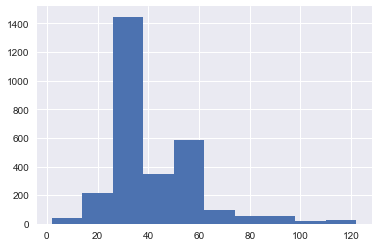

In [446]:
df_clean['Pledge_Window'].hist();

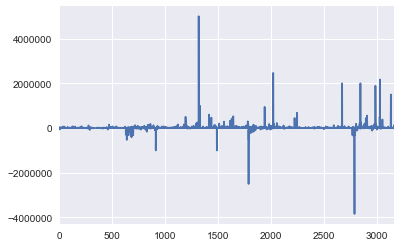

In [449]:
df_clean['Gap'].plot();

In [451]:
def log_transform(row):
    log_variable = (np.log(row['Goal_Amt']))
    return log_variable

df_clean['Log_Goal']=df_clean.apply(log_transform, axis=1)

In [557]:
def log_transform(row):
    log_variable = (np.log(row['Pledged_Amt']))
    return log_variable

df_clean['Log_Pledge']=df_clean.apply(log_transform, axis=1)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [455]:
def log_transform(row):
    log_variable = (np.log(row['Gap']))
    return log_variable

df_clean['Log_Gap']=df_clean.apply(log_transform, axis=1)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


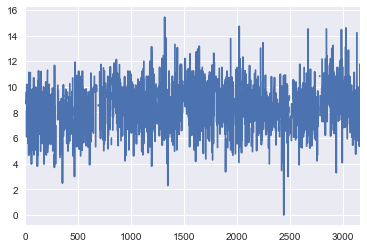

In [462]:
df_clean['Log_Gap'].plot();

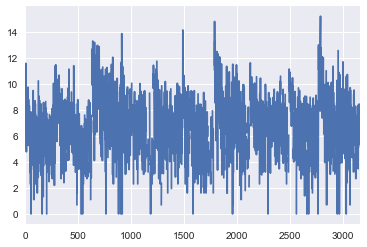

In [463]:
df_clean['Log_Pledge'].plot();

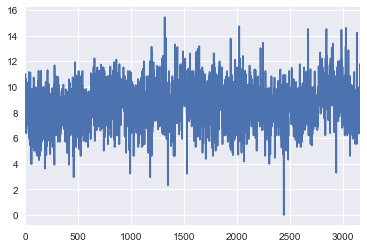

In [464]:
df_clean['Log_Goal'].plot();

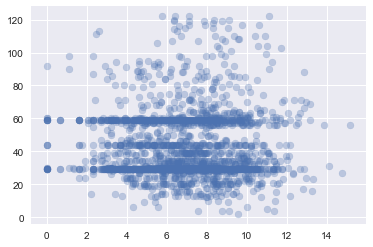

In [467]:
y = df_clean['Log_Pledge'].values
x = df_clean['Pledge_Window']


plt.scatter(y, x, alpha=.3)

In [469]:
def bins(row):
    if row['Pledge_Window'] <= 30:
        return 1
    else:
        return 0

df_clean['Pledge_Bracket']=df_clean.apply(bins, axis=1)

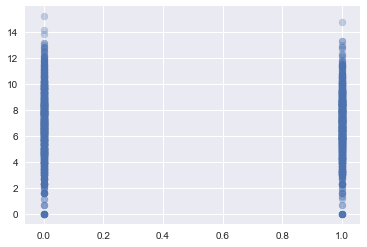

In [471]:
y = df_clean['Log_Pledge'].values
x = df_clean['Pledge_Bracket']


plt.scatter(x, y, alpha=.3)

In [472]:
df_clean.corr()

,Goal_Amt,Pledged_Amt,Backers_,Days_Left_,Project_We_Love,US,UK,Canada,Mexico,Gap,Pledge_Window,Log_Goal,Log_Pledge,Log_Gap,Pledge_Bracket
Goal_Amt,1.000000,0.030763,0.014169,0.018118,-0.003379,0.020540,-0.014119,-0.016898,-0.024581,0.810124,0.039597,0.348339,0.042007,0.353220,-0.041394
Pledged_Amt,0.030763,1.000000,0.865897,-0.040875,0.116574,0.017562,-0.007825,-0.008469,-0.021250,-0.561059,0.017308,0.120978,0.275245,0.115962,-0.026622
Backers_,0.014169,0.865897,1.000000,-0.031022,0.149527,0.025923,-0.011295,-0.006797,-0.027413,-0.496145,0.006808,0.113350,0.316408,0.075079,-0.009645
Days_Left_,0.018118,-0.040875,-0.031022,1.000000,-0.059550,-0.029947,-0.015836,-0.005420,0.051034,0.038979,0.550177,0.025272,-0.142656,0.073396,-0.391498
Project_We_Love,-0.003379,0.116574,0.149527,-0.059550,1.000000,-0.040054,0.012571,0.005952,0.041294,-0.071173,-0.019151,0.132153,0.350537,0.025914,0.016282
US,0.020540,0.017562,0.025923,-0.029947,-0.040054,1.000000,-0.436767,-0.283109,-0.236613,0.006710,-0.046993,0.041806,0.030123,0.056423,0.070019
UK,-0.014119,-0.007825,-0.011295,-0.015836,0.012571,-0.436767,1.000000,-0.083270,-0.069595,-0.007104,-0.025456,-0.067816,0.007489,-0.088092,0.041297
Canada,-0.016898,-0.008469,-0.006797,-0.005420,0.005952,-0.283109,-0.083270,1.000000,-0.045111,-0.009027,-0.015477,-0.045244,-0.021129,-0.033169,0.002989
Mexico,-0.024581,-0.021250,-0.027413,0.051034,0.041294,-0.236613,-0.069595,-0.045111,1.000000,-0.007893,0.043149,-0.084102,-0.118482,-0.068815,-0.070125
Gap,0.810124,-0.561059,-0.496145,0.038979,-0.071173,0.006710,-0.007104,-0.009027,-0.007893,1.000000,0.022641,0.217526,-0.193921,0.347358,-0.018667


In [479]:


lm1 = smf.ols('Pledged_Amt ~ Backers_ + Days_Left_ + Project_We_Love + US  + Pledge_Bracket', data=df_clean)

fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Pledged_Amt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1738.
Date:                Thu, 27 Apr 2017   Prob (F-statistic):               0.00
Time:                        14:41:05   Log-Likelihood:                -35328.
No. Observations:                2890   AIC:                         7.067e+04
Df Residuals:                    2884   BIC:                         7.070e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        5500.5735   2535.871      2.169      0.030       528.271  1.05e+04
Backers_          115.3677      1.252     92.143      0.000       112.913   117.823
Days_Left_       -178.9490     70.040     -2.555      0.011      -316.282   -41.616
Project_We_Love -4463.2059   2933.914     -1.521      0.128     -1.02e+04  1289.573
US               -868.7317   1878.775     -0.462      0.644     -4552.609  2815.145
Pledge_Bracket  -5501.7340   2000.180     -2.751      0.006     -9423.660 -1579.808
==============================================================================
Omnibus:                     5457.063   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26890322.353
Skew:                          13.636   Prob(JB):                         0.00
Kurtosis:                     474.770   Cond. No.                     2.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [489]:
lm1 = smf.ols('Pledged_Amt ~ Backers_ + Days_Left_  + Pledge_Bracket', data=df_clean)

fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Pledged_Amt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     2896.
Date:                Thu, 27 Apr 2017   Prob (F-statistic):               0.00
Time:                        14:51:47   Log-Likelihood:                -35330.
No. Observations:                2890   AIC:                         7.067e+04
Df Residuals:                    2886   BIC:                         7.069e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       4416.6793   2264.018      1.951      0.051       -22.577  8855.935
Backers_         115.0707      1.238     92.971      0.000       112.644   117.498
Days_Left_      -173.2641     69.947     -2.477      0.013      -310.416   -36.112
Pledge_Bracket -5548.2443   1996.238     -2.779      0.005     -9462.441 -1634.048
==============================================================================
Omnibus:                     5471.897   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27357626.058
Skew:                          13.717   Prob(JB):                         0.00
Kurtosis:                     478.856   Cond. No.                     2.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [486]:
df_clean['Pledged_Prop'] = (df_clean['Pledged_Amt'] - df_clean['Goal_Amt'])/df_clean['Goal_Amt']

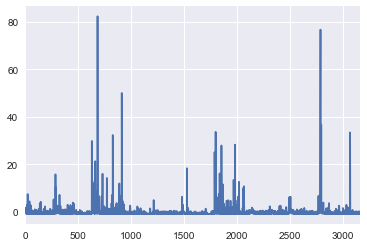

In [488]:
df_clean['Pledged_Prop'].plot()

In [481]:

lm1 = smf.ols('Gap ~ Backers_ +  Project_We_Love   + Pledge_Bracket', data=df_clean)

fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Gap   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     315.1
Date:                Thu, 27 Apr 2017   Prob (F-statistic):          5.96e-177
Time:                        14:43:18   Log-Likelihood:                -38469.
No. Observations:                2890   AIC:                         7.695e+04
Df Residuals:                    2886   BIC:                         7.697e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept            3e+04   4021.596      7.459      0.000      2.21e+04  3.79e+04
Backers_         -112.7187      3.707    -30.408      0.000      -119.987  -105.450
Project_We_Love  1862.5458   8673.390      0.215      0.830     -1.51e+04  1.89e+04
Pledge_Bracket  -7920.8336   5442.821     -1.455      0.146     -1.86e+04  2751.375
==============================================================================
Omnibus:                     6268.223   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36141600.084
Skew:                          18.976   Prob(JB):                         0.00
Kurtosis:                     549.532   Cond. No.                     2.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [493]:
lm1 = smf.ols('Pledged_Prop ~ Backers_ + Days_Left_   + Pledge_Bracket', data=df_clean)

fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Pledged_Prop   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     516.4
Date:                Thu, 27 Apr 2017   Prob (F-statistic):          1.28e-268
Time:                        14:54:09   Log-Likelihood:                -6923.2
No. Observations:                2890   AIC:                         1.385e+04
Df Residuals:                    2886   BIC:                         1.388e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -0.1435      0.122     -1.177      0.239        -0.383     0.096
Backers_           0.0026   6.67e-05     39.099      0.000         0.002     0.003
Days_Left_        -0.0109      0.004     -2.883      0.004        -0.018    -0.003
Pledge_Bracket    -0.2027      0.108     -1.886      0.059        -0.414     0.008
==============================================================================
Omnibus:                     4975.112   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11681314.679
Skew:                          11.326   Prob(JB):                         0.00
Kurtosis:                     313.635   Cond. No.                     2.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [509]:
lm1 = smf.ols('Pledged_Amt ~ Backers_ + Days_Left_   + Pledge_Bracket', data=df_clean)

fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Pledged_Amt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     2896.
Date:                Thu, 27 Apr 2017   Prob (F-statistic):               0.00
Time:                        16:52:24   Log-Likelihood:                -35330.
No. Observations:                2890   AIC:                         7.067e+04
Df Residuals:                    2886   BIC:                         7.069e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       4416.6793   2264.018      1.951      0.051       -22.577  8855.935
Backers_         115.0707      1.238     92.971      0.000       112.644   117.498
Days_Left_      -173.2641     69.947     -2.477      0.013      -310.416   -36.112
Pledge_Bracket -5548.2443   1996.238     -2.779      0.005     -9462.441 -1634.048
==============================================================================
Omnibus:                     5471.897   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27357626.058
Skew:                          13.717   Prob(JB):                         0.00
Kurtosis:                     478.856   Cond. No.                     2.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [619]:
import patsy
y, X = patsy.dmatrices('Pledged_Amt ~ Backers_ + Days_Left_   + Pledge_Bracket', data=df_clean, return_type="dataframe")

In [635]:
y

,Pledged_Amt
0,19846.0
1,7943.0
2,20505.0
3,104554.0
4,8805.0
6,4108.0
7,5032.0
8,1062.0
9,118.0
10,10574.0


In [634]:
from sklearn.cross_validation import cross_val_score

reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=2, scoring='neg_mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)

[  2.01719098e+09   3.53208966e+09]


(-20000, 20000)

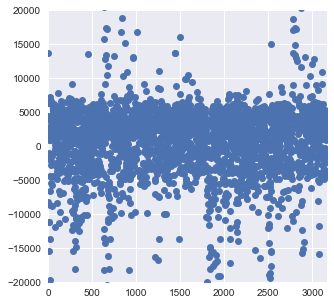

In [629]:
lm1 = smf.ols('Pledged_Amt ~ Backers_ + Days_Left_   + Pledge_Bracket', data=df_clean)

fit2 = lm1.fit()
# Print summary statistics of the model's performance
fit2.summary()
ax1 = plt.subplot(111)
fit2.resid.plot(style='o', figsize=(5,5))
ax1.set_ylim(-20000,20000)
#fit2.resid.plot(figsize=(8,8))

(-100000, 100000)

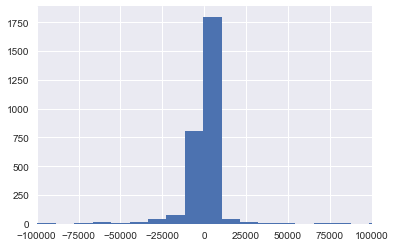

In [596]:
ax1 = plt.subplot(111)
fit2.resid.hist(bins=200)
ax1.set_xlim(-100000,100000)


In [540]:
def score(row):
    score = 4416.6793 + row['Backers_']*115.0707 + row['Days_Left_']*(-173.2641)+ row['Pledge_Bracket']*(-5548.2443)
    return score

df_clean['y_hat']=df_clean.apply(score, axis=1)


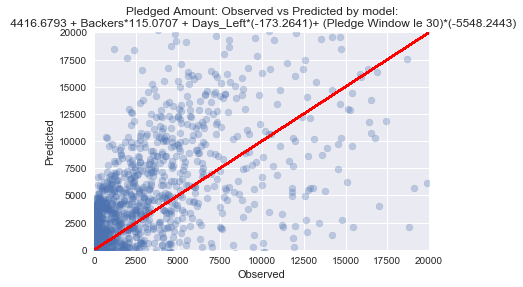

In [724]:
y = df_clean['Pledged_Amt'].values
y_hat = df_clean['y_hat']


#plt.figure(figsize=(4,4))

plt.plot(y,y,'k-', color='r')
#plt.plot( [0,0],[4,4] )
#plt.axhline(y=y_hat, color='r')
plt.scatter(y , y_hat, alpha=.3)
plt.xlim(0,20000)
plt.ylim(0,20000)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Pledged Amount: Observed vs Predicted by model:\n 4416.6793 + Backers*115.0707 + Days_Left*(-173.2641)+ (Pledge Window le 30)*(-5548.2443)')
plt.savefig('stations_1.png', bbox_inches='tight')

In [ ]:
plt.plot(y,y,'k-', color='r')
#plt.plot( [0,0],[4,4] )
#plt.axhline(y=y_hat, color='r')
plt.scatter(y , y_hat, alpha=.3)
plt.xlim(0,20000)
plt.ylim(0,20000)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Pledged Amount: Observed vs Predicted')
plt.savefig('stations_2.png', bbox_inches='tight')

In [579]:
df_clean.Pledged_Amt.describe(percentiles=[0.05,  0.25,  0.5,  0.75,  0.95, 0.99])

count    2.890000e+03
mean     1.119194e+04
std      9.875926e+04
min      0.000000e+00
5%       0.000000e+00
25%      4.400000e+01
50%      5.700000e+02
75%      3.521500e+03
95%      3.305120e+04
99%      1.669441e+05
max      3.890731e+06
Name: Pledged_Amt, dtype: float64

## Winsorizing

In [639]:
def outlier(row):
    if row['Pledged_Amt'] > 3.305120e+04:
        return 3.305120e+04
    else:
        return row['Pledged_Amt']
    return

df_clean['Pledged_Amt_adj'] = df_clean.apply(outlier, axis=1)


## Rebuilding the model on with winsorized Pledged Amount

In [700]:
# This is model on Slide 6 in presentation

lm1 = smf.ols('Pledged_Amt_adj ~ Backers_ + Days_Left_ + Project_We_Love  + Mexico  + Pledge_Bracket', data=df_clean)
fit2 = lm1.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Pledged_Amt_adj   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     224.1
Date:                Fri, 28 Apr 2017   Prob (F-statistic):          1.61e-202
Time:                        01:00:08   Log-Likelihood:                -29723.
No. Observations:                2890   AIC:                         5.946e+04
Df Residuals:                    2884   BIC:                         5.949e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        4768.5923    331.311     14.393      0.000      4118.961  5418.223
Backers_            3.8021      0.180     21.125      0.000         3.449     4.155
Days_Left_        -48.5644     10.072     -4.822      0.000       -68.313   -28.816
Project_We_Love  8723.3893    421.790     20.682      0.000      7896.349  9550.430
Mexico          -4299.4703    708.117     -6.072      0.000     -5687.937 -2911.003
Pledge_Bracket  -1574.8456    287.365     -5.480      0.000     -2138.307 -1011.384
==============================================================================
Omnibus:                     1200.767   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18184.711
Skew:                           1.558   Prob(JB):                         0.00
Kurtosis:                      14.887   Cond. No.                     4.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(-20000, 20000)

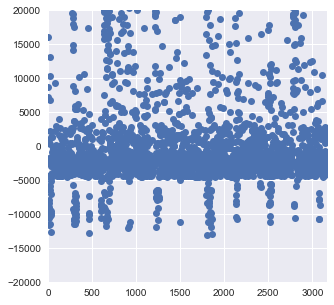

In [701]:
#Residuals plot
ax1 = plt.subplot(111)
fit2.resid.plot(style='o', figsize=(5,5))
ax1.set_ylim(-20000,20000)

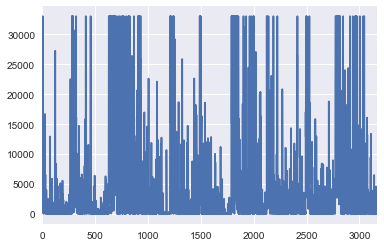

In [641]:
# Plot of winsorized Pledged_Amt 
# The mass around 1,000 makes me 
df_clean['Pledged_Amt_adj'].plot();

In [644]:
def score(row):
    score = 4768.5923 + row['Backers_']*3.8021 + row['Days_Left_']*(-48.5644)+ row['Pledge_Bracket']*(-1574.8456)+ row['Project_We_Love']*(-1574.8456) + row['Mexico']*(-4299.4703)
    return score

df_clean['y_hat2']=df_clean.apply(score, axis=1)

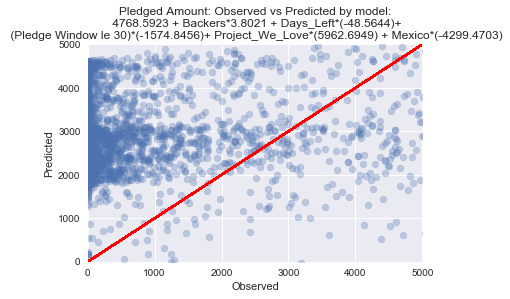

In [726]:
y = df_clean['Pledged_Amt_adj'].values
y_hat = df_clean['y_hat2']


#plt.figure(figsize=(4,4))

plt.plot(y,y,'k-', color='r')
#plt.plot( [0,0],[4,4] )
#plt.axhline(y=y_hat, color='r')
plt.scatter(y , y_hat, alpha=.3)
plt.xlim(0,5000)
plt.ylim(0,5000)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Pledged Amount: Observed vs Predicted by model:\n 4768.5923 + Backers*3.8021 + Days_Left*(-48.5644)+\n (Pledge Window le 30)*(-1574.8456)+ Project_We_Love*(5962.6949) + Mexico*(-4299.4703)')
plt.savefig('stations_2.png', bbox_inches='tight')

In [682]:
df_gt1k = df_clean[df_clean.Pledged_Amt > 1000]

In [683]:
df_gt1k.Pledged_Amt.min()

1002.0

In [685]:
df_le1k = df_clean[df_clean.Pledged_Amt <= 1000]

In [687]:
df_le1k.Pledged_Amt.max()

1000.0

In [703]:
lm1 = smf.ols('Pledged_Amt_adj ~ Backers_  + Project_We_Love  + Mexico  + Pledge_Bracket', data=df_gt1k)

fit2 = lm1.fit()
# Print summary statistics of the model's performance
fit2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Pledged_Amt_adj   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     76.65
Date:                Fri, 28 Apr 2017   Prob (F-statistic):           5.77e-58
Time:                        01:01:52   Log-Likelihood:                -12827.
No. Observations:                1213   AIC:                         2.566e+04
Df Residuals:                    1208   BIC:                         2.569e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        8774.6897    421.183     20.833      0.000      7948.359  9601.020
Backers_            3.1592      0.243     13.001      0.000         2.682     3.636
Project_We_Love  5962.6949    645.272      9.241      0.000      4696.716  7228.674
Mexico          -8883.2598   2884.732     -3.079      0.002     -1.45e+04 -3223.618
Pledge_Bracket  -2218.4727    546.601     -4.059      0.000     -3290.866 -1146.080
==============================================================================
Omnibus:                      183.110   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.182
Skew:                           0.850   Prob(JB):                     4.24e-91
Kurtosis:                       5.312   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(-25000, 25000)

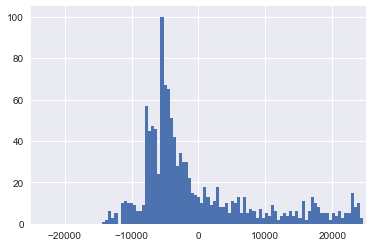

In [711]:
ax1 = plt.subplot(111)
fit2.resid.hist(bins=200)
ax1.set_xlim(-25000,25000)

(-10000, 10000)

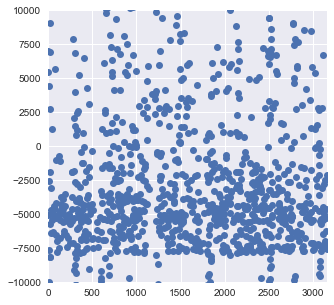

In [710]:
ax1 = plt.subplot(111)
fit2.resid.plot(style='o', figsize=(5,5))
ax1.set_ylim(-10000,10000)

In [689]:
def score(row):
    score = 8774.6897 + row['Backers_']*3.1592 +  row['Project_We_Love']*5962.6949 + row['Mexico']*-8883.2598 +row['Pledge_Bracket']*2218.4727
    return score

df_gt1k['y_hat']=df_gt1k.apply(score, axis=1)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


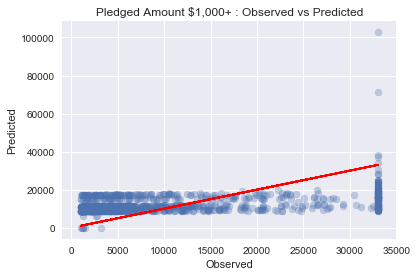

In [699]:
y = df_gt1k['Pledged_Amt_adj'].values
y_hat = df_gt1k['y_hat']


#plt.figure(figsize=(4,4))

plt.plot(y,y,'k-', color='r')
#plt.plot( [0,0],[4,4] )
#plt.axhline(y=y_hat, color='r')
plt.scatter(y , y_hat, alpha=.3)
#plt.xlim(1000,5000)
#plt.ylim(1000,5000)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Pledged Amount $1,000+ : Observed vs Predicted')
plt.savefig('gt1k_adj.png', bbox_inches='tight')

In [714]:
lm1 = smf.ols('Pledged_Amt_adj ~ Backers_    ', data=df_le1k)

fit3 = lm1.fit()
# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Pledged_Amt_adj   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1918.
Date:                Fri, 28 Apr 2017   Prob (F-statistic):          7.71e-280
Time:                        01:37:26   Log-Likelihood:                -11102.
No. Observations:                1677   AIC:                         2.221e+04
Df Residuals:                    1675   BIC:                         2.222e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     76.4606      5.331     14.342      0.000        66.004    86.917
Backers_      22.9505      0.524     43.790      0.000        21.923    23.978
==============================================================================
Omnibus:                      381.892   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7858.095
Skew:                           0.525   Prob(JB):                         0.00
Kurtosis:                      13.553   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [696]:
def score(row):
    score = 76.4606 + row['Backers_']*22.9505 
    return score

df_le1k['y_hat']=df_le1k.apply(score, axis=1)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


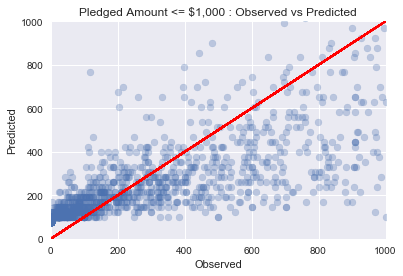

In [698]:
y = df_le1k['Pledged_Amt_adj'].values
y_hat = df_le1k['y_hat']


#plt.figure(figsize=(4,4))

plt.plot(y,y,'k-', color='r')
#plt.plot( [0,0],[4,4] )
#plt.axhline(y=y_hat, color='r')
plt.scatter(y , y_hat, alpha=.3)
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Pledged Amount <= $1,000 : Observed vs Predicted')
plt.savefig('le1k_adj.png', bbox_inches='tight')

(-100, 100)

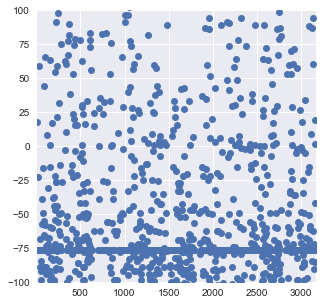

In [708]:
ax1 = plt.subplot(111)
fit3.resid.plot(style='o', figsize=(5,5))
ax1.set_ylim(-100,100)

(-100, 100)

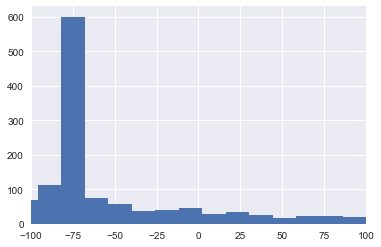

In [713]:
ax1 = plt.subplot(111)
fit3.resid.hist(bins=200)
ax1.set_xlim(-100,100)